In [ ]:
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/darshan0201/ProjectMachine/main/water_potability.csv'

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
data=pd.read_csv(url)

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Data Cleaning

In [ ]:
data.shape #Rows,Column


(3276, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.fillna(data.mean(),inplace=True)  # data filling null values with mean values [Missing value Handling]

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Exploratory data analysis

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


checking if we need to do dimensionality Reduction  [we reduce one dimension if two are correlating]

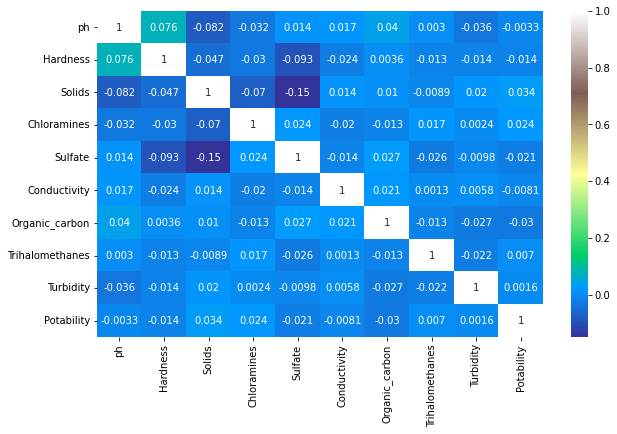

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Let's check the outlier using Boxplot

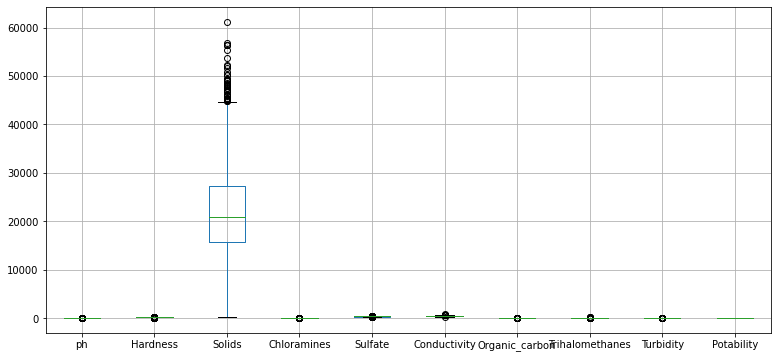

In [ ]:
data.boxplot(figsize=(13,6))

In [ ]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [ ]:
data['Solids']

0       20791.318981
1       18630.057858
2       19909.541732
3       22018.417441
4       17978.986339
            ...     
3271    47580.991603
3272    17329.802160
3273    33155.578218
3274    11983.869376
3275    17404.177061
Name: Solids, Length: 3276, dtype: float64

not removing outliers coz they may be important to decide quality of water

more eda

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.shape

(3276, 10)

In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


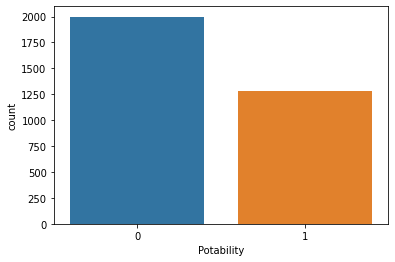

In [ ]:
sns.countplot(data['Potability'])
plt.show()

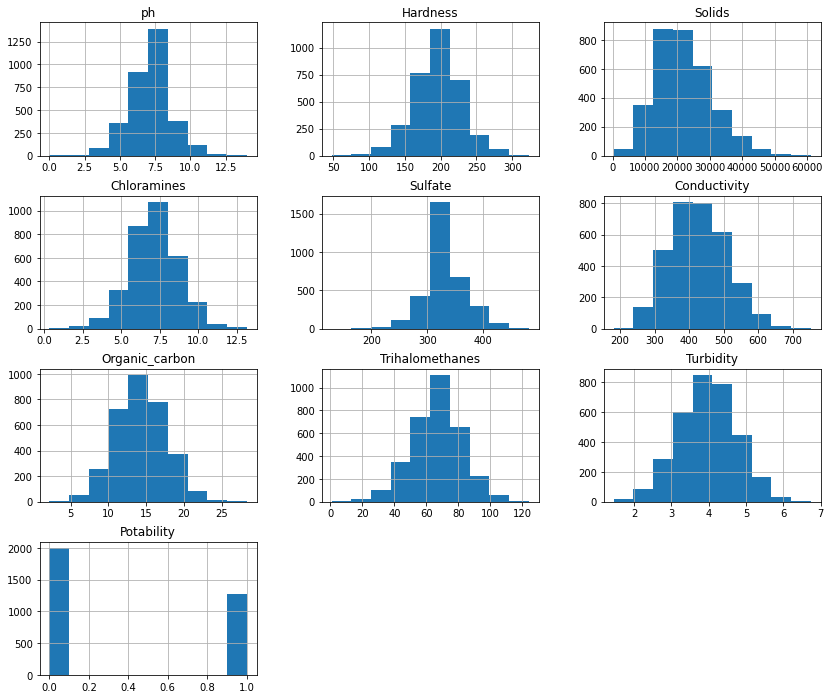

In [ ]:
data.hist(figsize=(14,12))
plt.show()

all input variables /columns are equally distributed

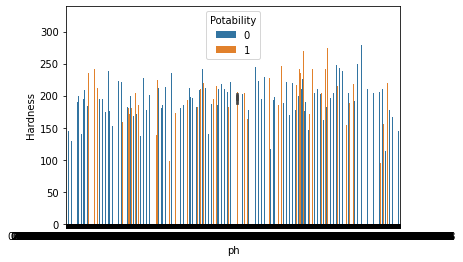

In [ ]:
sns.barplot(x=data['ph'],y=data['Hardness'],
            hue=data['Potability'])
plt.show()

#Partitioning

In [ ]:
X=data.drop('Potability',axis=1) #Input data

In [ ]:
Y=data['Potability'] #Target variable

In [ ]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=101)

#Normalisation

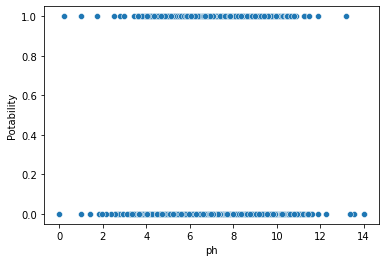

In [ ]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

#Model Training

In [ ]:
#Model Training

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=9,splitter='best')

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [ ]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [ ]:
Y_prediction=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(Y_prediction,Y_test) * 100 # mesuring accuracy

60.518292682926834

In [ ]:
confusion_matrix(Y_prediction,Y_test)

array([[268, 125],
       [134, 129]])

In [ ]:
Y_test.shape

(656,)

# Model Optimisation / Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
dt = DecisionTreeClassifier()

criterion =["gini","entropy"]
splitter = ['best','random']
min_samples_split=range(1,10)

parameters = dict(criterion=criterion,splitter=splitter,min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=5,random_state=101)
grid_search_cv_dt = GridSearchCV(estimator=dt,param_grid=parameters,scoring='accuracy',cv=cv)

In [ ]:
grid_search_cv_dt.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(grid_search_cv_dt.best_params_)


{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'best'}


In [ ]:
grid_search_cv_dt.predict(X_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prediction_grid=grid_search_cv_dt.predict(X_test)


In [ ]:
accuracy_score(Y_test,prediction_grid) * 100

59.29878048780488

In [ ]:
confusion_matrix=(Y_test,prediction_grid)

In [ ]:
#dt.predict([[5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

In [ ]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2541,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2605,8.445219,228.522860,28966.569327,6.179855,333.775777,361.705354,14.554220,60.612230,4.400706
330,6.737004,220.100102,24694.744205,8.373660,333.775777,384.308673,6.748092,8.175876,4.063170
515,5.701155,233.515043,41411.601707,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
400,6.259652,208.379430,37356.746401,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405
...,...,...,...,...,...,...,...,...,...
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2970,10.933111,162.424918,18846.634913,7.085261,333.775777,593.725764,14.977233,60.690580,3.894989
50,7.080795,168.388431,27492.307307,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057
839,7.611610,222.252269,25063.683013,8.561124,287.948123,505.265483,18.273757,68.395413,2.873261


In [ ]:
#KNN

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,Y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [ ]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(Y_test,prediction_knn)*100,'%')

accuracy_score score     :  61.737804878048784 %


In [ ]:
#confusion_matrix(prediction , Y_test)


NameError: ignored

#Hyperparameter Tuning / Model Optimization
#DT HPT

In [ ]:
dt.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
#example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.591 using {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.582 (0.033) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.572 (0.033) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.583 (0.034) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.574 (0.030) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.584 (0.030) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.583 (0.030) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.584 (0.029) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.588 (0.026) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.591 (0.028) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.587 (0.026) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.588 (0.031) with: {'criterion': 'entropy'

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score

def classification_report_with_accuracy_score(Y_test, y_pred2):
    print (classification_report(Y_test, y_pred2)) # print classification report
    return accuracy_score(Y_test, y_pred2) # return accuracy score

    
nested_score = cross_val_score(grid_search_dt, X=X_train, y=Y_train, cv=cv, 
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-54-e8cc3119bf88>", line 5, in classification_report_with_accuracy_score
    print (classification_report(Y_test, y_pred2)) # print classification report
NameError: name 'classification_report' is not defined

  UserWarning,
/usr/local/lib/python3.7/di

KeyboardInterrupt: ignored

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
Y_pred = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[402   0]
 [254   0]]


In [ ]:
from sklearn.metrics import accuracy_score
acc_lr_test=accuracy_score(Y_test, Y_pred)*100
print ("Accuracy of test: ", acc_lr_test ,"%")

Accuracy of test:  61.28048780487805 %


In [ ]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = Y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

CV:  0.6095419847328245


In [ ]:
models = [('Logistic Regression',  acc_lr_test,cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)',  acc_knn_test,cv_knn.mean()),
          
          ('Decision Tree Classification',  acc_dt_test,cv_dt.mean()),
          
         ]

NameError: ignored

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

NameError: ignored